# Predicting Exoplanet Habitability Using Machine Learning
## Week 1: Data Collection & Understanding

### Objective
The goal of this week is to understand exoplanet characteristics, host star properties, 
and identify initial patterns related to planetary habitability using exploratory data analysis.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


In [2]:
import pandas as pd

df = pd.read_csv(
    r"C:\Users\tumar\Desktop\ExoHabit-AI\data\raw\exoplanet_raw.csv",
    comment="#"
)

df.head()


C:\Users\tumar\AppData\Local\Temp\ipykernel_8516\1474856372.py:3: DtypeWarning: Columns (0: hd_name, 1: hip_name) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_dr2_id,gaia_dr3_id,default_flag,...,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec
0,1,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,Gaia DR3 3946945413106333696,1,...,2023-09-19,2023-08,2023-09-19,2.0,1.0,2.0,0.0,0.0,0.0,0.0
1,2,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,Gaia DR3 3946945413106333696,0,...,2014-05-14,2008-01,2014-05-14,2.0,1.0,2.0,0.0,0.0,0.0,0.0
2,3,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,Gaia DR3 3946945413106333696,0,...,2014-07-23,2011-08,2014-07-23,2.0,1.0,2.0,0.0,0.0,0.0,0.0
3,4,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,Gaia DR3 1696798367260229376,0,...,2018-04-25,2009-10,2014-05-14,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,5,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,Gaia DR3 1696798367260229376,1,...,2018-09-04,2017-03,2018-09-06,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [3]:
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 39212 entries, 0 to 39211
Columns: 123 entries, rowid to pl_ndispec
dtypes: float64(88), int64(7), str(28)
memory usage: 36.8 MB


### Initial Observation
The dataset contains multiple numerical and categorical features related to planets 
and their host stars. Missing values are present, which is expected in astronomical datasets.


In [11]:
df.describe()


,rowid,default_flag,sy_snum,sy_pnum,sy_mnum,cb_flag,disc_year,rv_flag,pul_flag,ptv_flag,...,sy_icmag,sy_tmag,sy_kepmag,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec
count,39212.000000,39212.000000,39212.000000,39212.000000,39212.0,39212.000000,39212.000000,39192.000000,39192.000000,39192.000000,...,45.000000,38364.000000,31158.000000,39162.000000,39162.000000,39162.000000,39162.000000,39162.000000,39162.000000,39162.000000
mean,19606.500000,0.154672,1.085153,1.918622,0.0,0.002397,2015.535346,0.250485,0.000332,0.000051,...,22.495844,12.769854,14.112651,1.023518,0.470533,0.195879,0.110132,0.108626,0.214443,0.005439
std,11319.673714,0.361596,0.308205,1.238585,0.0,0.048903,4.001613,0.433298,0.018210,0.007143,...,5.099006,2.337041,1.439140,1.124503,3.796267,0.887284,0.778205,0.931585,1.579140,0.153759
min,1.000000,0.000000,1.000000,1.000000,0.0,0.000000,1992.000000,0.000000,0.000000,0.000000,...,17.130000,-1.200000,5.973000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9803.750000,0.000000,1.000000,1.000000,0.0,0.000000,2014.000000,0.000000,0.000000,0.000000,...,19.000000,11.788900,13.353000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19606.500000,0.000000,1.000000,1.000000,0.0,0.000000,2016.000000,0.000000,0.000000,0.000000,...,21.390000,13.456700,14.417000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29409.250000,0.000000,1.000000,2.000000,0.0,0.000000,2016.000000,1.000000,0.000000,0.000000,...,23.430000,14.443500,15.212000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,39212.000000,1.000000,4.000000,8.000000,0.0,1.000000,2026.000000,1.000000,1.000000,1.000000,...,37.240000,19.506000,17.475000,16.000000,70.000000,12.000000,13.000000,19.000000,32.000000,6.000000


In [4]:
df.isnull().sum().sort_values(ascending=False)


sy_icmag           39167
pl_occdep          39165
pl_trueobliq       39147
pl_cmasse          39124
pl_cmassj          39124
                   ...  
discoverymethod        0
pl_name                0
rowid                  0
pl_letter              0
hostname               0
Length: 123, dtype: int64

Missing values arise due to observational limitations and incomplete measurements.
These will be handled carefully in Week 2.


## Dataset Overview

The dataset used in this project contains detailed information about exoplanets
and their host stars. Exoplanets are planets that exist outside our solar system,
and studying their characteristics helps scientists identify planets that may
support life.

The dataset includes both planetary parameters and stellar parameters, which
together influence the habitability potential of an exoplanet.

## Key Features in the Dataset

- **Planet Radius**: Indicates the size of the planet. Extremely large or very
  small planets are less likely to support life.
- **Planet Mass**: Helps determine the planet’s gravity and atmospheric retention.
- **Orbital Period**: Represents the time taken by the planet to complete one
  orbit around its host star.
- **Equilibrium Temperature**: An estimate of the planet’s surface temperature,
  which is critical for habitability analysis.
- **Host Star Temperature**: Determines the energy received by the planet.
- **Stellar Characteristics**: Properties of the host star that influence
  planetary climate and stability.

## Initial Observations

- The dataset contains missing values in several columns, which will require
  cleaning in the next phase.
- Planetary and stellar features vary significantly across observations.
- Certain features show potential relevance for determining habitability.

This dataset forms the foundation for further preprocessing, feature engineering,
and machine learning model development in subsequent phases of the project.


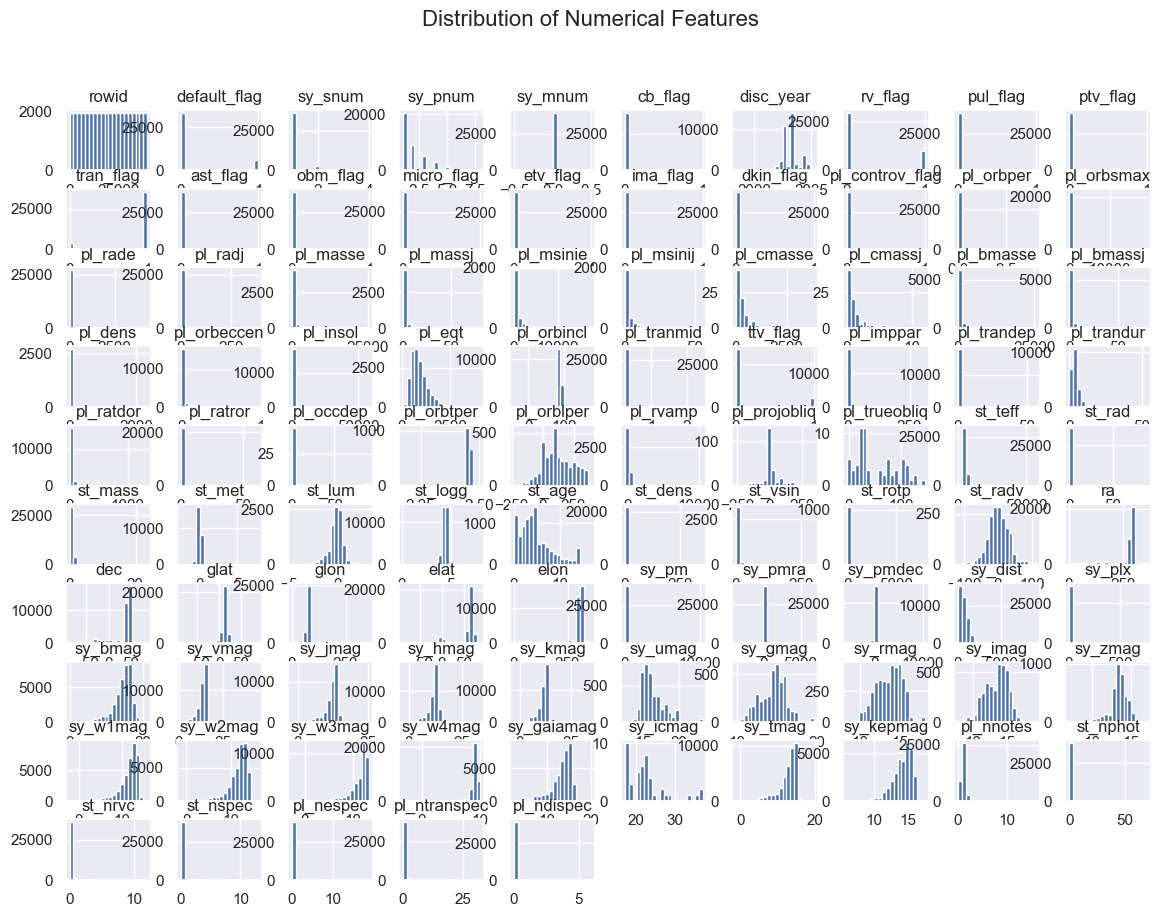

In [5]:
df.hist(figsize=(14,10), bins=20)
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()


In [7]:
# Select only numerical columns for correlation analysis
numeric_df = df.select_dtypes(include=["int64", "float64"])

numeric_df.head()


,rowid,default_flag,sy_snum,sy_pnum,sy_mnum,cb_flag,disc_year,rv_flag,pul_flag,ptv_flag,...,sy_icmag,sy_tmag,sy_kepmag,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec
0,1,1,2,1,0,0,2007,1.0,0.0,0.0,...,NaN,3.83790,NaN,2.0,1.0,2.0,0.0,0.0,0.0,0.0
1,2,0,2,1,0,0,2007,1.0,0.0,0.0,...,NaN,3.83790,NaN,2.0,1.0,2.0,0.0,0.0,0.0,0.0
2,3,0,2,1,0,0,2007,1.0,0.0,0.0,...,NaN,3.83790,NaN,2.0,1.0,2.0,0.0,0.0,0.0,0.0
3,4,0,1,1,0,0,2009,1.0,0.0,0.0,...,NaN,3.82294,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,5,1,1,1,0,0,2009,1.0,0.0,0.0,...,NaN,3.82294,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0


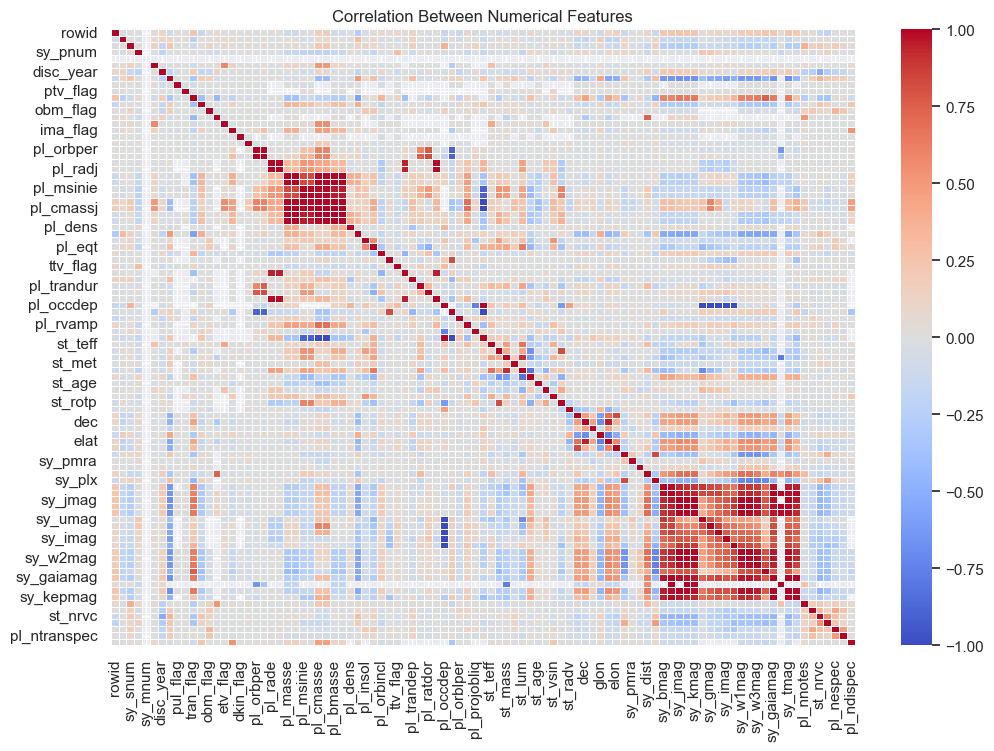

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Numerical Features")
plt.show()


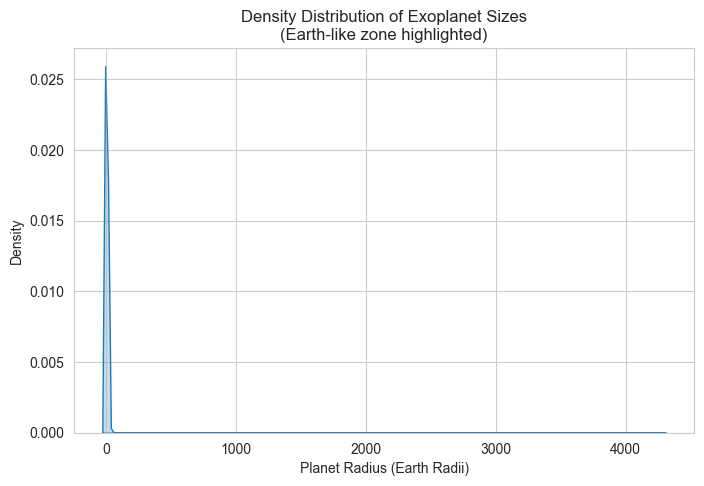

In [5]:
plt.figure(figsize=(8,5))
sns.kdeplot(df['pl_rade'], fill=True)
plt.axvspan(0.5, 2.0, alpha=0.2)
plt.xlabel("Planet Radius (Earth Radii)")
plt.title("Density Distribution of Exoplanet Sizes\n(Earth-like zone highlighted)")
plt.show()


Most detected exoplanets are larger than Earth, indicating detection bias toward large planets.


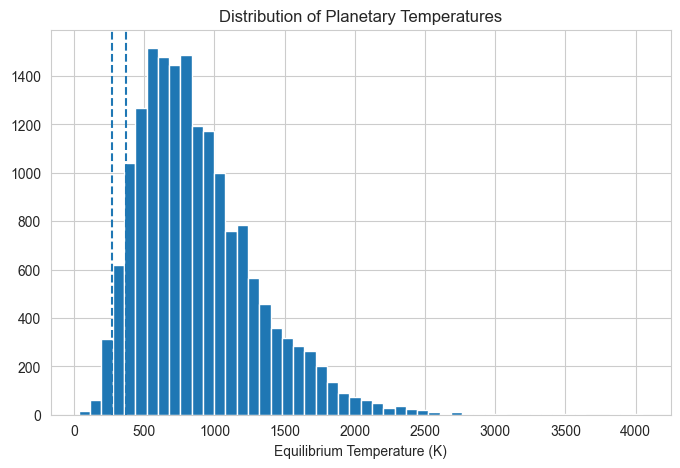

In [6]:
plt.figure(figsize=(8,5))
plt.hist(df['pl_eqt'], bins=50)
plt.axvline(273, linestyle='--')
plt.axvline(373, linestyle='--')
plt.xlabel("Equilibrium Temperature (K)")
plt.title("Distribution of Planetary Temperatures")
plt.show()


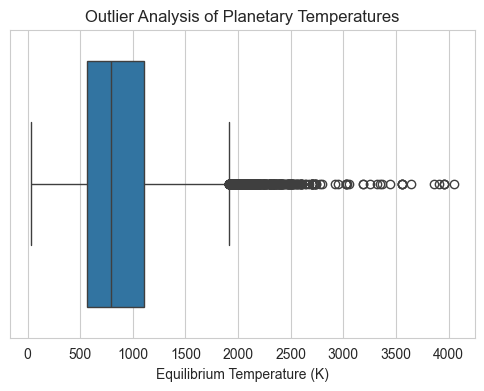

In [7]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['pl_eqt'])
plt.xlabel("Equilibrium Temperature (K)")
plt.title("Outlier Analysis of Planetary Temperatures")
plt.show()


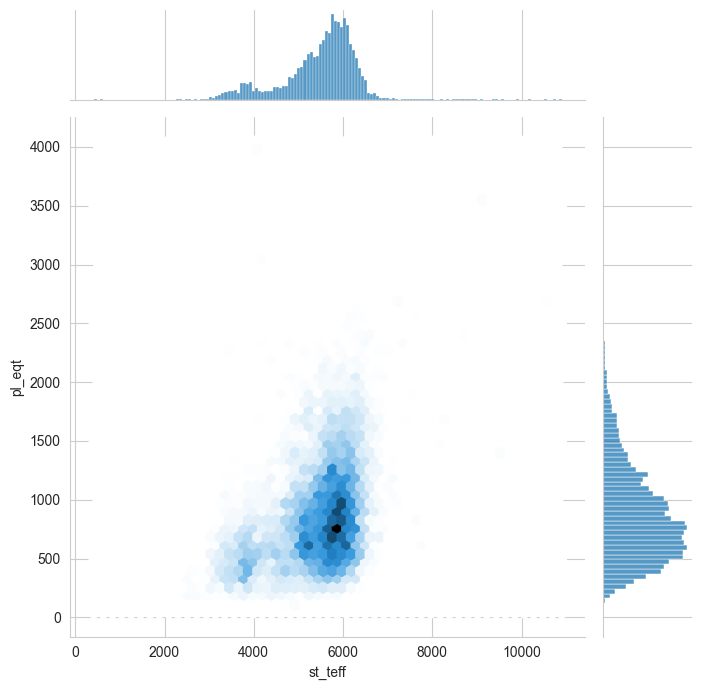

In [8]:
sns.jointplot(
    x=df['st_teff'],
    y=df['pl_eqt'],
    kind="hex",
    height=7
)
plt.show()


Planetary temperature increases with host star temperature, confirming astrophysical expectations.


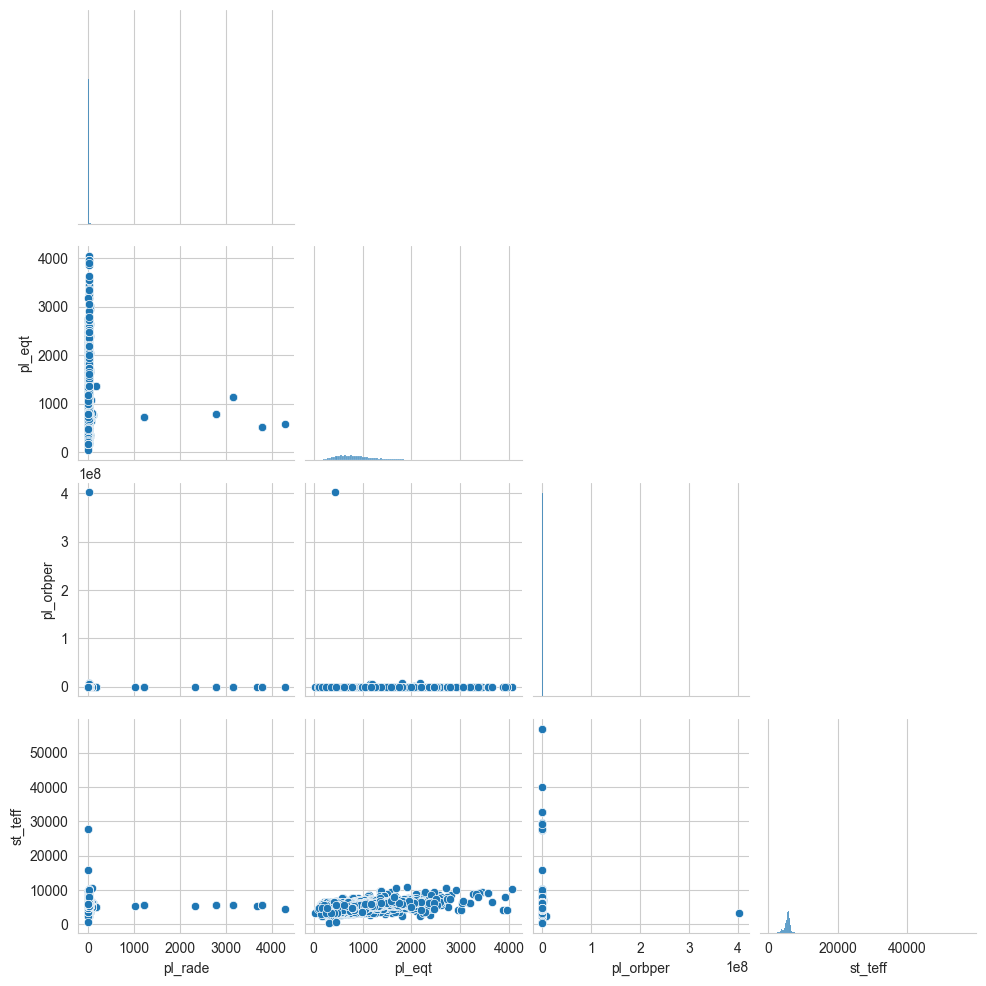

In [9]:
sns.pairplot(
    df[['pl_rade','pl_eqt','pl_orbper','st_teff']],
    corner=True
)
plt.show()


## Week 1 Summary & Observations

- The dataset shows a strong bias toward large exoplanets.
- Only a small fraction of planets fall within temperatures suitable for liquid water.
- Host star temperature plays a significant role in determining planetary temperature.
- Short-period planets tend to be much hotter and less habitable.
- These insights guide data cleaning and feature engineering in Week 2.
